In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")
print(len(api_key))

32


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
xbt_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
xbt_headlines

# Print total articles
print(f"Total articles about Bitcoin: {xbt_headlines['totalResults']}")

# Show sample article
xbt_headlines["articles"][0]

Total articles about Bitcoin: 3647


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin is also having a very, very bad day',
 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…',
 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750',
 'publishedAt': '2020-03-12T12:34:45Z',
 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
eth_headlines

# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][0]

Total articles about Ethereum: 779


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin is also having a very, very bad day',
 'description': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month — including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes. On CoinGecko, 1 BTC was worth around $7,250 across…',
 'url': 'http://techcrunch.com/2020/03/12/bitcoin-is-also-having-a-very-very-bad-day/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/04/bitcoin-bitfinex.jpg?w=750',
 'publishedAt': '2020-03-12T12:34:45Z',
 'content': 'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
xbt_sentiments = []

for article in xbt_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        xbt_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(xbt_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral","text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,positive,negative,neutral,text
0,-0.2944,0.074,0.078,0.847,Bitcoin is going through a remarkably bad day....
1,0.0000,0.000,0.000,1.000,After launching two cryptocurrency-oriented sm...
2,-0.5106,0.103,0.168,0.730,Indias Supreme Court on Wednesday overturned c...
3,0.7893,0.137,0.000,0.863,Our robot colleague Satoshi Nakaboto writes ab...
4,0.5070,0.068,0.000,0.932,Our robot colleague Satoshi Nakaboto writes ab...


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral","text"]
eth_df = eth_df[cols]

eth_df.head()

,compound,positive,negative,neutral,text
0,-0.2944,0.074,0.078,0.847,Bitcoin is going through a remarkably bad day....
1,0.0000,0.000,0.000,1.000,If a player picks up an item in an online vide...
2,0.8176,0.179,0.000,0.821,Web browser Brave is expanding its cryptocurre...
3,-0.1027,0.000,0.035,0.965,"Coinbase Card, the Visa debit card that lets y..."
4,0.3182,0.112,0.066,0.822,When it comes to celebrities shilling shady in...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.148303,0.083863,0.054611,0.861547
std,0.528455,0.066450,0.067163,0.085894
min,-0.933700,0.000000,0.000000,0.616000
25%,-0.318000,0.047000,0.000000,0.820000
50%,0.318200,0.068000,0.040000,0.881000
75%,0.516850,0.110000,0.090500,0.932000
max,0.923100,0.331000,0.295000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.244521,0.075454,0.028216,0.896340
std,0.434869,0.063765,0.040891,0.064231
min,-0.717400,0.000000,0.000000,0.734000
25%,0.000000,0.000000,0.000000,0.847000
50%,0.340000,0.068000,0.000000,0.899000
75%,0.571900,0.113000,0.046000,0.944000
max,0.895500,0.266000,0.156000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the high positive score, with a mean of 0.083.  This compared to the 0.075 for Ethereum.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compund score of 0.24.  This compared to Bitcoin, which had a score of 0.14. 

Q. Which coin had the highest positive score?

A: Bitcoin had the high max positive score with a 0.331.  This compared to Ethereum with a 0.266. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
#Defining the Lemmatizer 
wnl = WordNetLemmatizer()

In [13]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    lower_case = [word.lower() for word in words if word.lower() not in sw and word.lower() not in punctuation]
    
    # Lemmatize Words into root words
    result = [wnl.lemmatize(word) for word in lower_case]
    
    return result


In [15]:
# Create a new tokens column for bitcoin
bitcoin_df["token"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df

,compound,positive,negative,neutral,text,token
0,-0.2944,0.074,0.078,0.847,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,0.0000,0.000,0.000,1.000,After launching two cryptocurrency-oriented sm...,"[launching, two, cryptocurrency-oriented, smar..."
2,-0.5106,0.103,0.168,0.730,Indias Supreme Court on Wednesday overturned c...,"[india, supreme, court, wednesday, overturned,..."
3,0.7893,0.137,0.000,0.863,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.5070,0.068,0.000,0.932,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
...,...,...,...,...,...,...
90,-0.9337,0.000,0.295,0.705,A former Microsoft software engineer who screw...,"[former, microsoft, software, engineer, screwe..."
91,-0.8020,0.028,0.186,0.786,A California judge has given the go-ahead for ...,"[california, judge, given, go-ahead, 240m, law..."
92,0.5719,0.101,0.000,0.899,Bitcoin has taken investors on a roller-coaste...,"[bitcoin, taken, investor, roller-coaster, rid..."
93,0.3612,0.051,0.000,0.949,It seems that every time Bitcoin seems like it...,"[seems, every, time, bitcoin, seems, like, cou..."


In [16]:
# Create a new tokens column for ethereum
eth_df["token"] = eth_df.text.apply(tokenizer)
eth_df

,compound,positive,negative,neutral,text,token
0,-0.2944,0.074,0.078,0.847,Bitcoin is going through a remarkably bad day....,"[bitcoin, going, remarkably, bad, day, turn, a..."
1,0.0000,0.000,0.000,1.000,If a player picks up an item in an online vide...,"[player, pick, item, online, video, game, owns..."
2,0.8176,0.179,0.000,0.821,Web browser Brave is expanding its cryptocurre...,"[web, browser, brave, expanding, cryptocurrenc..."
3,-0.1027,0.000,0.035,0.965,"Coinbase Card, the Visa debit card that lets y...","[coinbase, card, visa, debit, card, let, spend..."
4,0.3182,0.112,0.066,0.822,When it comes to celebrities shilling shady in...,"[come, celebrity, shilling, shady, initial, co..."
...,...,...,...,...,...,...
92,0.4019,0.068,0.000,0.932,The South Korean National Assembly passed new ...,"[south, korean, national, assembly, passed, ne..."
93,0.8625,0.266,0.000,0.734,Financial services giant Morningstar has value...,"[financial, service, giant, morningstar, value..."
94,0.8779,0.236,0.000,0.764,"Decrypt, a major cryptocurrency and blockchain...","[decrypt, major, cryptocurrency, blockchain, p..."
95,0.2023,0.104,0.063,0.833,The Ethereum (ETH) community has recently been...,"[ethereum, eth, community, recently, engaged, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_list = []
for text in bitcoin_df['token']:
    for word in text:
        bitcoin_list.append(word)
bitcoin_count = Counter(ngrams(bitcoin_list, n=2), ascending=True)
bitcoin_count.most_common(10)

[(('satoshi', 'nakaboto'), 32),
 (('24', 'hour'), 17),
 (('char', 'robot'), 16),
 (('robot', 'colleague'), 16),
 (('colleague', 'satoshi'), 16),
 (('nakaboto', 'writes'), 16),
 (('writes', 'bitcoin'), 16),
 (('every', 'fucking'), 16),
 (('fucking', 'day'), 16),
 (('day', 'welcome'), 16)]

In [19]:
# Generate the Ethereum N-grams where N=2
eth_list = []
for text in eth_df['token']:
    for word in text:
        eth_list.append(word)
eth_count = Counter(ngrams(eth_list, n=2), ascending=True)
eth_count.most_common(10)

[(('char', 'eos'), 9),
 (('eos', 'eos'), 9),
 (('eos', 'ended'), 9),
 (('start', 'day'), 9),
 (('day', 'saw'), 9),
 (('saw', 'eos'), 9),
 (('ended', 'day'), 8),
 (('first', 'major'), 8),
 (('early', 'morning'), 7),
 (('morning', 'intraday'), 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

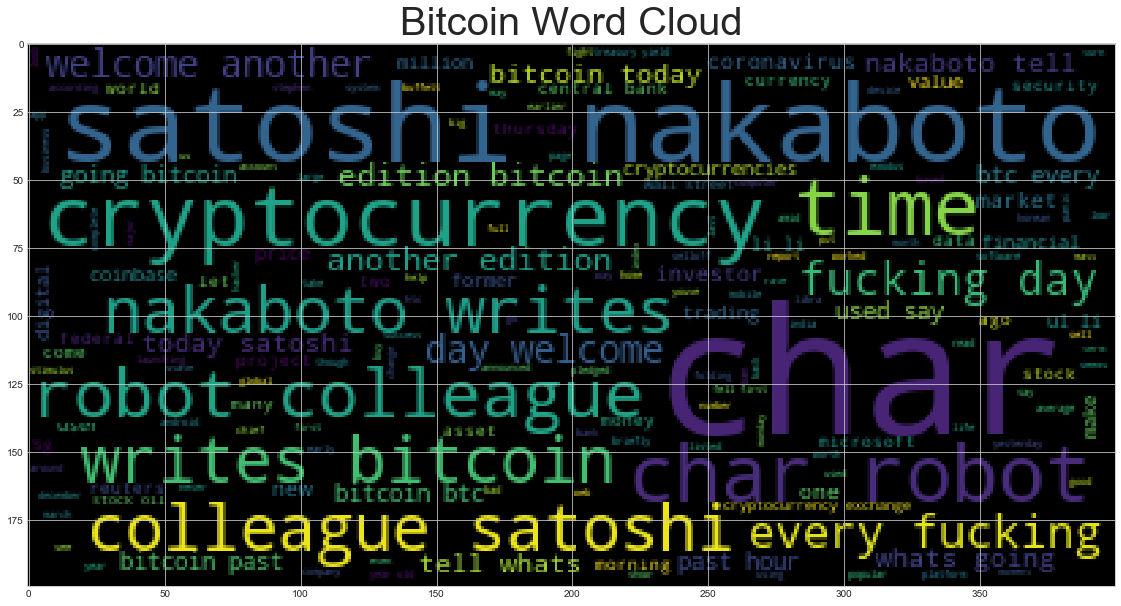

In [21]:
# Generate the Bitcoin word cloud
def process_text(corpus): 
# Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string
bitcoin_wc = process_text(bitcoin_list)
wc_xbt = WordCloud().generate(bitcoin_wc)
plt.title('Bitcoin Word Cloud', fontsize = 40)
plt.imshow(wc_xbt)

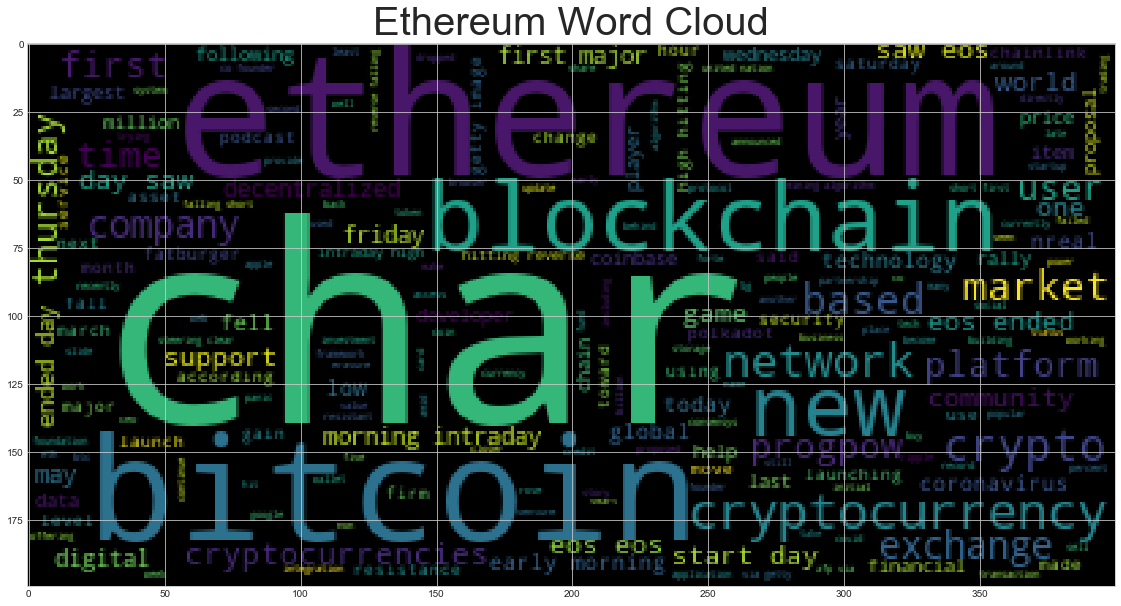

In [22]:
# Generate the Ethereum word cloud
def process_text(corpus): 
# Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string
eth_wc = process_text(eth_list)
wc_eth = WordCloud().generate(eth_wc)
plt.title('Ethereum Word Cloud', fontsize = 40)
plt.imshow(wc_eth)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [23]:
import spacy
from spacy import displacy

In [24]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [26]:
# Concatenate all of the bitcoin text together
bitcoin_all = ''
for row in bitcoin_df['text']:
    bitcoin_all = bitcoin_all + row
        
bitcoin_all[:3000]

'Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars]Indias Supreme Court on Wednesday overturned\xa0central banks two-year-old ban on cryptocurrency trading in the country in what many said was a historic verdict.\r\nThe Reserve Bank of India had imposed a ban on cryptocurrency trading in April 2018 that barred ban… [+1336 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you what

In [27]:
# Run the NER processor on all of the text
bit_doc = nlp(bitcoin_all)
# Add a title to the document
bit_doc.user_data['Title'] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(bit_doc, style='ent')

In [40]:
# List all Entities
print([ent.text for ent in bit_doc.ents if ent.label_ ])

['Bitcoin', 'A couple of hours ago', 'BTC', '15%', 'just 20 minutes', 'CoinGecko', '1', 'BTC', 'around $7,250', 'two', 'HTC Exodus 1', 'Exodus', '5', 'Bitcoin', 'HTC Exodus 5', 'Android-bas', 'Supreme Court', 'Wednesday', 'two-year-old', 'The Reserve Bank of India', 'April 2018', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Nikola Tesla', 'Success', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Descartes', 'Brian Brooks', 'first', 'the Office of the Comptroller of the Currency', 'April 1, 2020', 'Brooks', 'OCC', 'chars]The South Korean National Assembly', 'today', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Rousseau', 'Success', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Hegel', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bi

---

## Ethereum NER

In [30]:
# Concatenate all of the bitcoin text together
eth_all = ''
for row in eth_df['text']:
    eth_all = eth_all + row
        
eth_all[:3000]

"Bitcoin is going through a remarkably bad day. It turns out all assets are having a rough month including cryptocurrencies. A couple of hours ago, the average price of BTC dropped by 15% in just 20 minutes.\r\nOn CoinGecko, 1 BTC was worth around $7,250 across … [+1146 chars]If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars]Web browser Brave is expanding its cryptocurrency features with an integration with cryptocurrency exchange Binance. Brave users will be able to buy, trade and receive crypto assets directly on the new tab page.\r\nIn addition to a particular focus on privacy, … [+1292 chars]Coinbase Card, the Visa debit card that lets you spend cryptocurrency directly from your Coinbase account, now works with Google Pay.\xa0\r\nThis makes Coinbase, a U.S.-ba

In [35]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_all)
# Add a title to the document
eth_doc.user_data['Title'] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [41]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_ ])

['Bitcoin', 'A couple of hours ago', 'BTC', '15%', 'just 20 minutes', 'CoinGecko', '1', 'BTC', 'around $7,250', 'Brave', 'Visa', 'Google Pay', 'Coinbase', 'first', 'the Securities and Exchange Commission', 'Steven Seagal', 'Thursday', 'SEC', '2018', 'chars]The South Korean National Assembly', 'today', 'Thursday', '6,000', 'first', 'May', 'as low as $5,705.31', 'Bloomberg', 'one', 'Europe', 'U.S.', 'London', 'Bitcoin', 'Thursday', '6,000', 'first', 'May', 'as low as $5,705.31', 'Bloomberg', 'chars]7', '7', 'one-day', 'months', 'Bitcoin', '21 percent', 'the last 24 hours', 'Earlier today', 'Bitcoin', '6,000', 'first', '+1838 chars]Some Libra Association', 'Andreessen Horowitz', 'today', '50', 'The Celo Foundation', '‘Alliance For Prosperity’', 'Camila Russo', 'Building the Next Internet with Ethereum', 'Vitalik Buterin and', 'Jul', 'Intel', '26', '7 min', 'IRS', 'Thursday', 'bitcoin', '26%', 'daily', 'seven years', '5,700', 'chars]Hundreds of thousands', 'last night', 'Homea', '1,200%', 